In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 1.1 MB/s 


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 여자.jpeg to 여자.jpeg


여자.jpeg


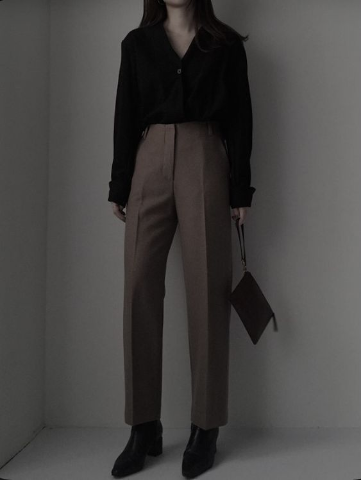

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

In [ ]:
import mediapipe as mp
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

LEFT_SHOULDER coordinates: (355.49809342622757, 68.45876863598824)
RIGHT_SHOULDER coordinates: (216.49948847293854, 67.80779922008514)
LEFT_HIP coordinates: (320.63103318214417, 295.1241546869278)
RIGHT_HIP coordinates: (240.51513776183128, 296.7962656021118)

LEFT_ELBOW coordinates: (372.46619898080826, 187.7012883424759)
LEFT_WRIST coordinates: (375.1234764456749, 293.19390082359314)
LEFT_KNEE coordinates: (324.75050789117813, 471.7051887512207)
LEFT_ANKLE coordinates: (323.6397238969803, 654.5743219852448)

Pose landmarks of 여자.jpeg:


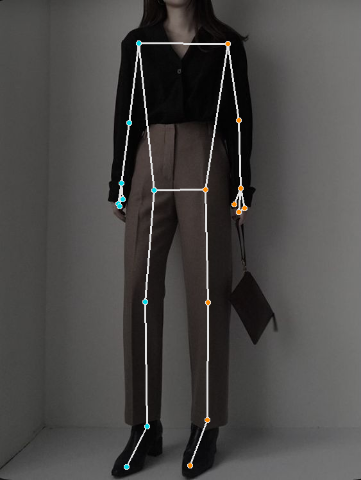

In [ ]:
# Run MediaPipe Pose and draw pose landmarks.
with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Print nose landmark.
    image_hight, image_width, _ = image.shape
    if not results.pose_landmarks:
      continue
    print(
      f'LEFT_SHOULDER coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].y * image_hight})'
      '\n'
      f'RIGHT_SHOULDER coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * image_hight})'
      '\n'
      f'LEFT_HIP coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].y * image_hight})'
      '\n'
      f'RIGHT_HIP coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y * image_hight})'
      '\n'
      '\n'
      f'LEFT_ELBOW coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y * image_hight})'
      '\n'
      f'LEFT_WRIST coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].y * image_hight})'
      '\n'
      f'LEFT_KNEE coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].y * image_hight})'
      '\n'
      f'LEFT_ANKLE coordinates: ('
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].x * image_width}, '
      f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].y * image_hight})'
      '\n'
    )

    # Draw pose landmarks.
    print(f'Pose landmarks of {name}:')
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    resize_and_show(annotated_image)

In [ ]:
import math

l_s_x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].x * image_width
l_s_y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].y * image_hight

r_s_x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x * image_width
r_s_y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * image_hight

l_h_x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].x * image_width
l_h_y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].y * image_hight

r_h_x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x * image_width
r_h_y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y * image_hight

l_k_x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].x * image_width
l_k_y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].y * image_hight

l_a_x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].x * image_width
l_a_y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].y * image_hight


s_len = math.sqrt(pow(l_s_x - r_s_x, 2) + pow(l_s_y - r_s_y, 2))

t_len = math.sqrt(pow(l_s_x - l_h_x, 2) + pow(l_s_y - l_h_y, 2))

h_len = math.sqrt(pow(l_h_x - r_h_x, 2) + pow(l_h_y - r_h_y, 2))

l_len = math.sqrt(pow(l_k_x - l_h_x, 2) + pow(l_k_y - l_h_y, 2)) + math.sqrt(pow(l_k_x - l_a_x, 2) + pow(l_k_y - l_a_y, 2))

slen = 1
tlen = t_len / s_len
hlen = h_len / s_len
llen = l_len / s_len


print(s_len, t_len, h_len, l_len)
print(slen, tlen, hlen, llen)

AttributeError: ignored

In [ ]:
code = []

#다리길이 / 몸통길이

if  (llen / tlen) < 1:
  code += '1'
elif (llen / tlen) < 1.3:
  code += '2'
else:
  code += '3'

#허리길이 / 어깨길이

if hlen < 0.6:
  code += '1'
elif hlen < 0.8:
  code += '2'
else:
  code += '3'

#몸통길이 / 어깨길이

if tlen < 1:
  code += '1'
elif tlen < 1.5:
  code += '2'
else:
  code += '3'

print((llen / tlen), hlen, tlen)
print(code)

1.315689746961953 0.5077331964217799 1.8843281455506653
['3', '1', '3']
